In [3]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [24]:
#讀取人口密度的資料
data1 = pd.read_csv('Pd.csv')
#創建一個同時包含CANADA和SINGAPORE人口密度的資料集
tempset1 = data1[(data1['Country Code'] == 'CAN') | (data1['Country Code'] == 'SGP')]
tempset1

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,加拿大,CAN,2.037903,2.076160,2.115198,2.155463,2.194836,2.236105,2.276705,2.313735,...,3.871939,3.913067,3.952605,3.982215,4.027564,4.076166,4.134149,4.193949,4.239226,4.349505
208,新加坡,SGP,2540.895522,2612.238806,2679.104478,2748.656716,2816.268657,2887.164179,2951.641791,3002.985075,...,7524.698300,7636.721358,7714.702398,7806.772920,7908.720733,7882.377809,7897.305322,7965.878492,7918.951253,7595.495822


In [6]:
Country = ['CANADA', 'SINGAPORE']

years = np.linspace(1961, 2021, 61)

#加拿大
Pd_country1 = data1.loc[35]

#新加坡
Pd_country2 = data1.loc[208]


alldata = {
    "CANADA": Pd_country1,
    "SINGAPORE": Pd_country2,
}

df = pd.DataFrame(alldata)
df = df.iloc[2:]
df

,CANADA,SINGAPORE
1961,2.037903,2540.895522
1962,2.07616,2612.238806
1963,2.115198,2679.104478
1964,2.155463,2748.656716
1965,2.194836,2816.268657
...,...,...
2017,4.076166,7882.377809
2018,4.134149,7897.305322
2019,4.193949,7965.878492
2020,4.239226,7918.951253


In [7]:
Country = ['SINGAPORE']

years = np.linspace(1961, 2021, 61)

#新加坡
Pd_country2 = data1.loc[208]

alldata = {
    "SINGAPORE": Pd_country2,
}

df1 = pd.DataFrame(alldata)
df1 = df1.iloc[2:]
df1

,SINGAPORE
1961,2540.895522
1962,2612.238806
1963,2679.104478
1964,2748.656716
1965,2816.268657
...,...
2017,7882.377809
2018,7897.305322
2019,7965.878492
2020,7918.951253


C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

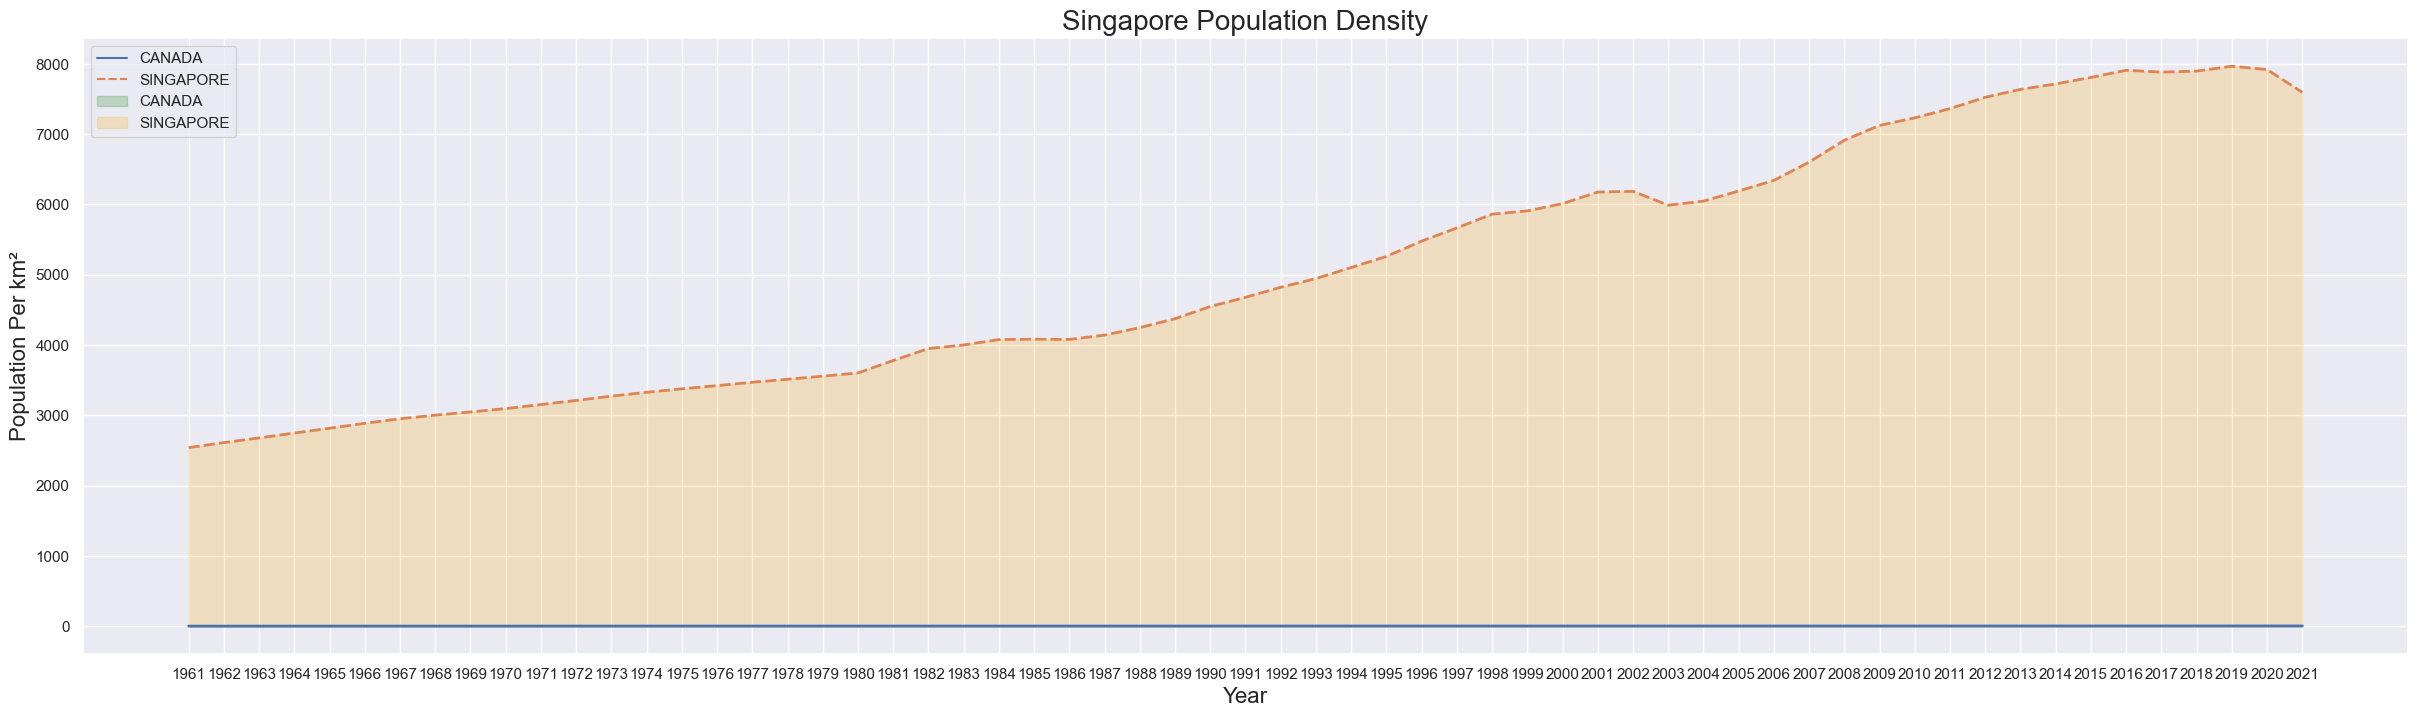

In [25]:
sns.set(rc={'figure.figsize': (30, 8)})

# 清理數據，移除 NaN 或 Inf
df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()

# 繪製面積圖
g = sns.lineplot(data=df_cleaned, linewidth=2)

g.fill_between(df_cleaned.index, df_cleaned['CANADA'], alpha=0.2, color='green', label='CANADA')

# 填充區域2，使用 'orange' 顏色
g.fill_between(df_cleaned.index, df_cleaned['SINGAPORE'], alpha=0.2, color='orange', label='SINGAPORE')

# 添加標題
plt.title('Singapore Population Density', fontsize=20)

# 添加 x 軸和 y 軸標籤
plt.xlabel('Year', fontsize=16)
plt.ylabel('Population Per km²', fontsize=16)

# 添加圖例
plt.legend()

# 顯示圖形
plt.show()

In [23]:
#讀取人均GDP的資料
data2 = pd.read_csv('GDP.csv')
#創建一個同時包含CANADA和SINGAPORE人均GDP的資料集
tempset2 = data2[(data2['Country Code'] == 'CAN') | (data2['Country Code'] == 'SGP')]
tempset2

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
35,加拿大,CAN,2259.288302,2240.442972,2268.580522,2374.484523,2555.133928,2770.358560,3047.036662,3217.152221,...,52635.17496,50955.99832,43596.13554,42315.60371,45129.42930,46547.79518,46374.15275,43349.67786,52358.62164,54966.48884
208,新加坡,SGP,428.056183,449.148137,472.082740,511.202235,485.530686,516.531928,566.803974,626.029437,...,56967.42579,57564.80231,55645.60686,56895.64334,61164.89736,66836.53851,66070.47067,61274.00646,77710.06996,82807.64908


In [11]:
Country = ['CANADA', 'SINGAPORE']

years = np.linspace(1960, 2022, 63)

#加拿大
GDP_country1 = data2.loc[35]
#新加坡
GDP_country2 = data2.loc[208]

alldata2 = {
    "CANADA": GDP_country1,
    "SINGAPORE": GDP_country2,
}

df2 = pd.DataFrame(alldata2)
df2 = df2.iloc[2:]
df2

,CANADA,SINGAPORE
1960,2259.288302,428.056183
1961,2240.442972,449.148137
1962,2268.580522,472.08274
1963,2374.484523,511.202235
1964,2555.133928,485.530686
...,...,...
2018,46547.79518,66836.53851
2019,46374.15275,66070.47067
2020,43349.67786,61274.00646
2021,52358.62164,77710.06996


C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Jessica\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

Text(0, 0.5, 'Current US$')

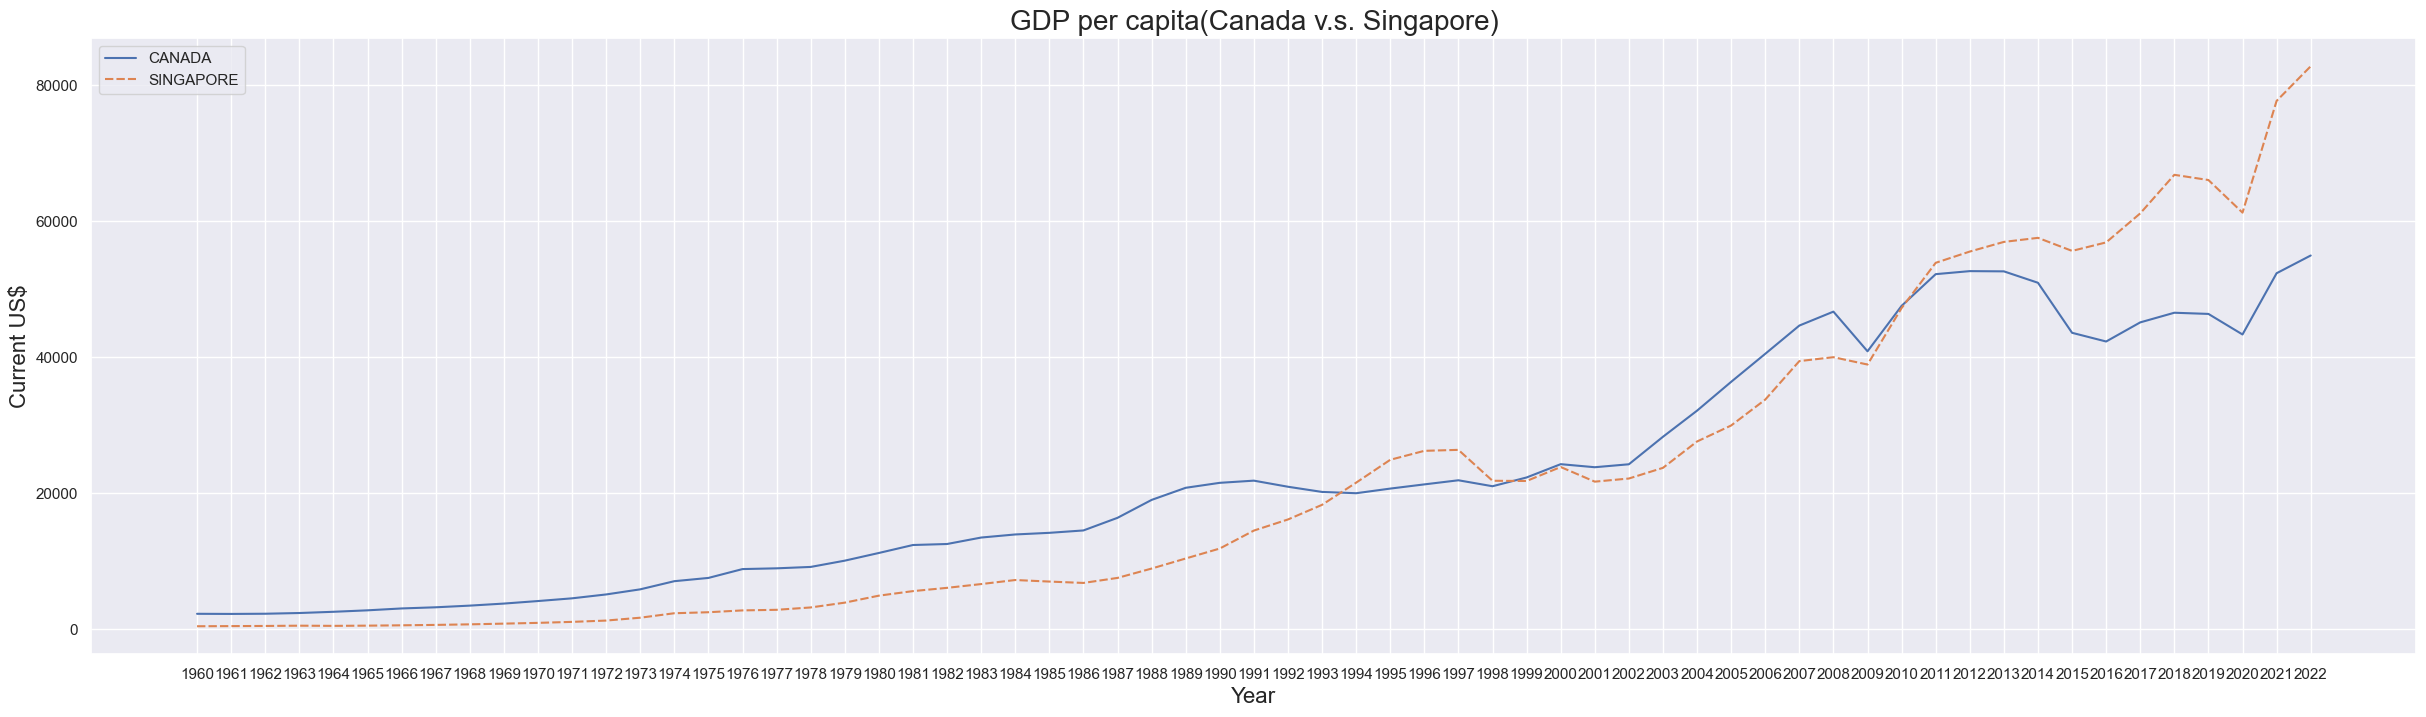

In [12]:
#人均GDP比較圖(加拿大V.S.新加坡)
sns.set(rc = {'figure.figsize':(30,8)})
g = sns.lineplot(data=df2)
plt.title('GDP per capita(Canada v.s. Singapore)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Current US$', fontsize=16)

In [14]:
data3 = pd.read_csv('area.csv')
Country = ['CANADA', 'SINGAPORE']

#加拿大
area_country1 = data3.loc[35]
#新加坡
area_country2 = data3.loc[208]

alldata3 = {
    "CANADA": area_country1,
    "SINGAPORE": area_country2,
}

df3 = pd.DataFrame(alldata3)
df3 = df3.iloc[62:]
df3

,CANADA,SINGAPORE
2021,15634410.0,728.0


<Figure size 1000x600 with 0 Axes>

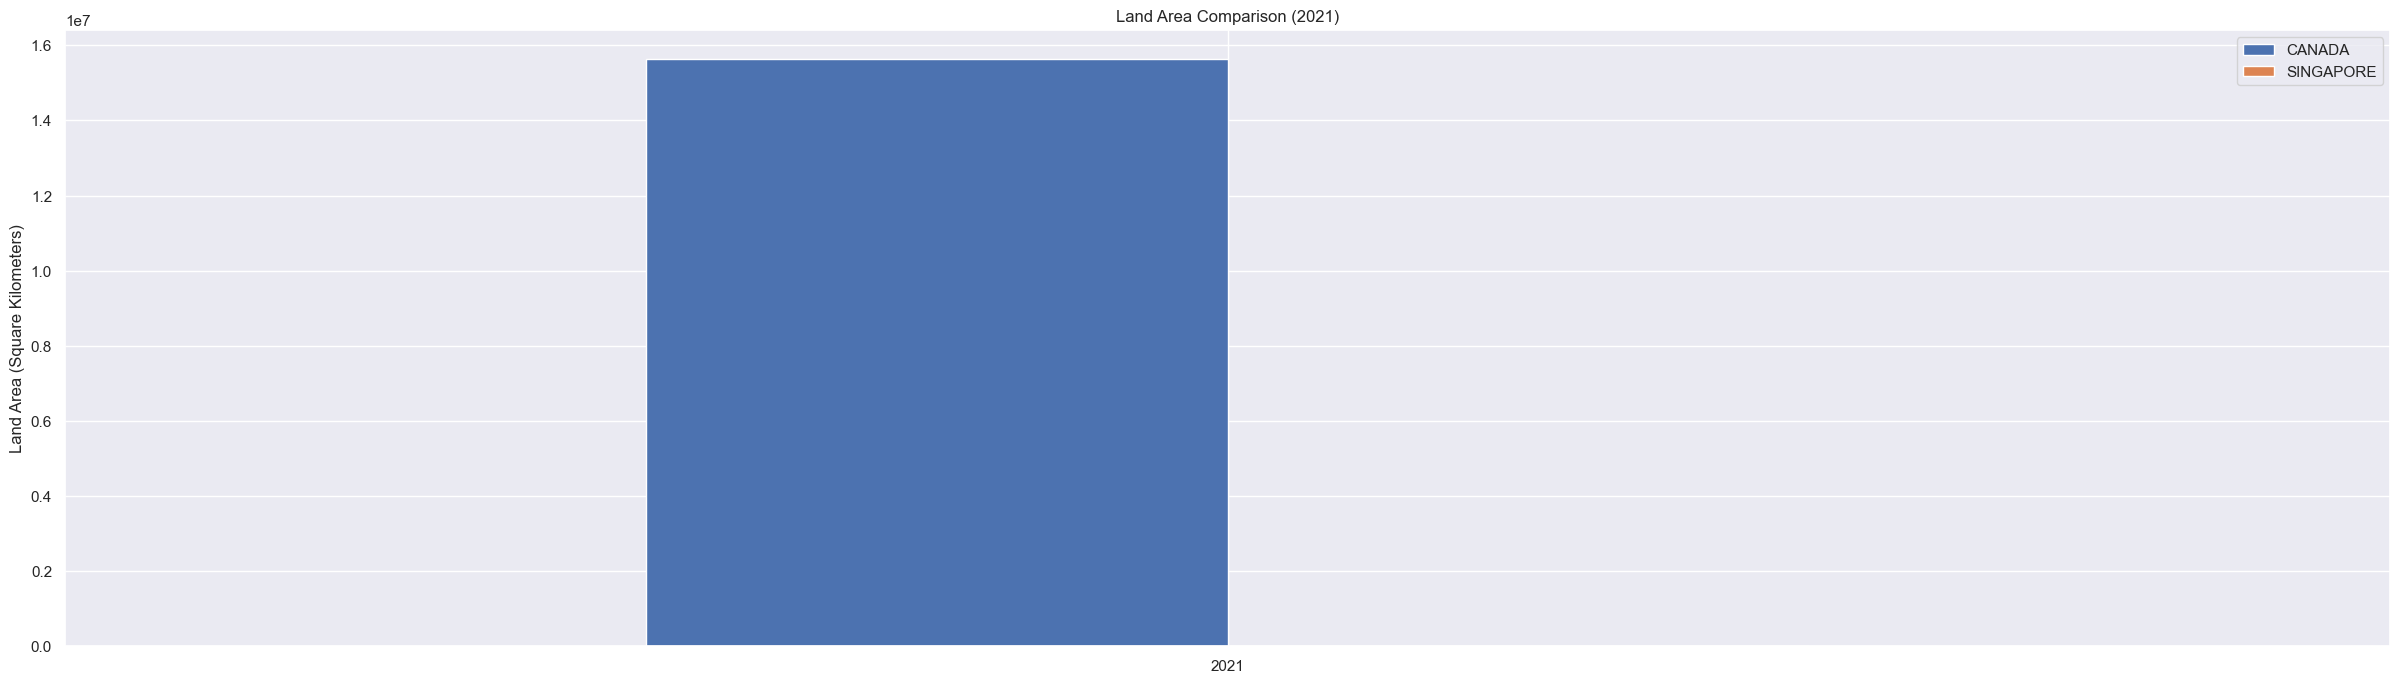

In [22]:
# 轉換數據類型
df3 = df3.astype(float)

# 繪製長條圖
plt.figure(figsize=(10, 6))
df3.plot(kind='bar', rot=0)
plt.title('Land Area Comparison (2021)')
plt.ylabel('Land Area (Square Kilometers)')
plt.show()